### Notes

* The maximum subarray problem studies how to maximize a value amongst a certain number of values in a timeframe.
* This is *not* the same as asking the range, because the min and max values may occur in the wrong order&mdash;start high, end low.
* The book solution uses a tripartite recursive solution: maximize the left array, maximize the right array, and compute the true maximum of the middle array. 
* The middle array problem is *not* a subcase, since it requires passing through the middle. It can be solved by simply going backwards and forwards until hitting a negative value.

### Python implementation

In [52]:
def max_crossing_subarray(arr, low, mid, high):
    left_sum = right_sum = -float('inf')
    max_left = max_right = mid
    sum_c = 0
    for i in range(mid, low - 1,-1):
        sum_c = sum_c + arr[i]
        if sum_c > left_sum:
            left_sum = sum_c
            max_left = i
    sum_c = 0
    for j in range(mid + 1, high + 1):
        sum_c = sum_c + arr[j]
        if sum_c > right_sum:
            right_sum = sum_c
            max_right = j
    # Note that we fencepost to get [0, ind_max + 1], because that's what fits into a Python range functions correctly.
    # The book doesn't consider this detail...
    return (max_left, max_right, sum(arr[max_left:max_right + 1]))

In [53]:
max_crossing_subarray([1,2,3],0,1,2)

(0, 2, 6)

In [54]:
max_crossing_subarray([1,-2,3,4],0,0,3)

(0, 3, 6)

In [55]:
def max_subarray(arr, low, high):
    if high == low:
        return low, high, arr[low]
    else:
        pivot = (high + low) // 2
        
        mid_low, mid_high, mid_sum = max_crossing_subarray(arr, low, pivot, high)
        left_low, left_high, left_sum = max_subarray(arr, low, pivot)
        right_low, right_high, right_sum = max_subarray(arr, pivot + 1, high)
        if mid_sum > max(left_sum, right_sum):
            return mid_low, mid_high, mid_sum
        elif left_sum > max(mid_sum, right_sum):
            return left_low, left_high, left_sum
        else:
            return right_low, right_high, right_sum

In [56]:
max_subarray([1,2,3,4], 0, 3)

(0, 3, 10)

In [57]:
max_subarray([1,2,-3,4], 0, 3)

(3, 3, 4)

### Formal timing

`max_crossing_subarray` is $\Theta(n)$. `max_subarray` uses a binary traversal to arrive at each `max_crossing_subarray` execution, so the overall algorithm is $\Theta[n\log(n)]$.

Worst-case performance occurs in case the list of values is totally positive, because the pivot decomposition will ignore it while `max_cross_subarray` will loop the maximum possible number of times every time. The O-class is the same, however. Best-case performance is a single positive number; again the O-class will be the same. But, there will be a high constant factor cost in this case.

In [58]:
from time import time

def timer(func, *args, **kwargs):
    start = time()
    func(*args, **kwargs)
    end = time()
    return end - start

In [61]:
import numpy as np

best = []
mid = []
worst = []

ns = np.logspace(0, 5, num=40)
for n in ns:
    n_ints = np.random.random(n)
    
    mid.append(timer(max_subarray, n_ints, 0, len(n_ints) - 1))
    worst.append(timer(max_subarray, np.abs(n_ints), 0, len(n_ints) - 1))
    best.append(timer(max_subarray, -np.abs(n_ints) + [2], 0, len(n_ints) - 1))

/Users/Honors/anaconda/envs/algos/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


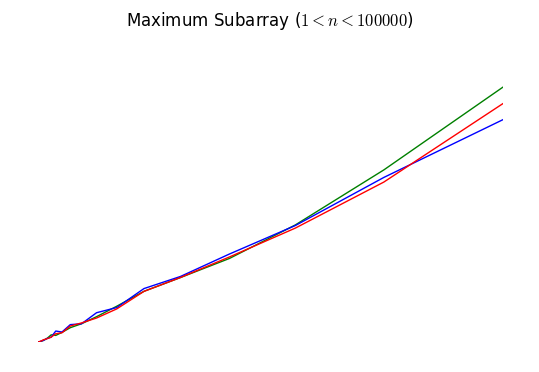

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(ns, best, color='green')
plt.plot(ns, mid, color='blue')
plt.plot(ns, worst, color='red')
ax = plt.gca()
ax.axis('off')
plt.title("Maximum Subarray ($1 < n < 100000$)")

### JavaScript implementation

In [6]:
%%javascript

window.max_crossing_subarray = function max_crossing_subarray(arr, low, mid, high) {
    let left_sum = -Infinity;
    let right_sum = -Infinity;
    let max_left = mid;
    let max_right = mid;

    let sum_c = 0;
    for (let i = mid; i > low - 1; i--) {
        sum_c = sum_c + arr[i];
        if (sum_c > left_sum) { left_sum = sum_c; max_left = i; }
    }
    sum_c = 0;
    for (let j = mid + 1; j < high + 1; j++) {
        sum_c = sum_c + arr[j];
        if (sum_c > right_sum) { right_sum = sum_c; max_right = j; }
    }

    return [max_left, max_right, left_sum + right_sum]
}

window.max_subarray = function max_subarray(arr, low, high) {
    if (high == low) { return [low, high, arr[low]]; }
    else {
        debugger;
        let pivot = Math.floor((high + low) / 2);
        console.log(pivot);
        let [mid_low, mid_high, mid_sum] = max_crossing_subarray(arr, low, pivot, high);
        let [left_low, left_high, left_sum] = max_subarray(arr, low, pivot);
        let [right_low, right_high, right_sum] = max_subarray(arr, pivot + 1, high);

        if (mid_sum > Math.max(left_sum, right_sum)) { return [mid_low, mid_high, mid_sum]; }
        else if (left_sum > Math.max(mid_sum, right_sum)) { return [left_low, left_high, left_sum]; }
        else { return [right_low, right_high, right_sum]; }
    }
}

window.print = function(id, output) { document.getElementById(id).innerHTML = String(output) }

<IPython.core.display.Javascript object>

In [7]:
%%html

<g id="holder_1"></g>
<script>window.print("holder_1", window.max_subarray([5,2,4,6,1,3], 0, 5))</script>

In [8]:
!mocha -g "Max Subarray"



  Max Subarray (Mocha)
    âˆš works with an empty list
    âˆš works with a negative unitary list
    âˆš works with a positive unitary list
    âˆš works with a totally negative list
    âˆš works with a totally positive list
    âˆš works with a mixed list


  6 passing (5ms)

